In [1]:
import re

import matplotlib.pyplot as plt
from Bio import SeqIO

In [2]:
def show_stats(filename):
    lengths = sorted(map(len, SeqIO.parse(filename, 'fasta')), reverse=True)
    n = sum(lengths)
    csum = 0
    for rec_len in lengths:
        csum += rec_len
        if csum * 2 >= n:
            n50 = rec_len
            break
    print(f'Stats for {filename}')
    print(f' - Number of records: {len(lengths)}')
    print(f' - Total length: {n}')
    print(f' - Longest record: {lengths[0]}')
    print(f' - N50: {n50}')
    
def extract_longest(filename):
    return max(SeqIO.parse(filename, 'fasta'), key=len)

def find_gaps(scaffold):  # lengths only
    return list(map(len, re.findall(r'N+', str(scaffold.seq))))

def show_gap_stats(scaffold, desc):
    gaps = find_gaps(scaffold)
    gap_count = len(gaps)
    total_length = sum(gaps)
    print(f'Gap stats for {desc}')
    print(f' - Gap count: {gap_count}')
    print(f' - Total gap length: {total_length}')

In [3]:
show_stats('../data/contigs.fasta')
print()
show_stats('../data/scaffolds_noClose.fasta')

Stats for ../data/contigs.fasta
 - Number of records: 607
 - Total length: 3924917
 - Longest record: 179307
 - N50: 53980

Stats for ../data/scaffolds_noClose.fasta
 - Number of records: 70
 - Total length: 3873759
 - Longest record: 3831941
 - N50: 3831941


In [4]:
longest = extract_longest('../data/scaffolds_noClose.fasta')
longest_closed = extract_longest('../data/scaffolds.fasta')
SeqIO.write([longest], '../data/longest_noClose.fasta', 'fasta')
SeqIO.write([longest_closed], '../data/longest.fasta', 'fasta')

1

In [5]:
show_gap_stats(longest, 'the longest scaffold')
print()
show_gap_stats(longest_closed, 'the longest scaffold (with closed gaps)')

Gap stats for the longest scaffold
 - Gap count: 63
 - Total gap length: 5979

Gap stats for the longest scaffold (with closed gaps)
 - Gap count: 12
 - Total gap length: 1312


In [6]:
scaff_count = []
gap_count = []
total_gap_count = []
gap_len = []
total_gap_len = []
# Для 10% показатели в разы хуже по сравнению с 20%
fracs = [0.1 * i for i in range(2, 11)]

for filename in (
    [f'../data/scaffolds_0.{i}.fasta' for i in range(2, 10)] + 
    ['../data/scaffolds.fasta']
):
    seq = sorted(SeqIO.parse(filename, 'fasta'), key=len, reverse=True)
    scaff_count.append(len(seq))
    gaps = [find_gaps(scaff) for scaff in seq]
    gap_count.append(len(gaps[0]))
    total_gap_count.append(sum(map(len, gaps)))
    gap_len.append(sum(gaps[0]))
    total_gap_len.append(sum(map(sum, gaps)))

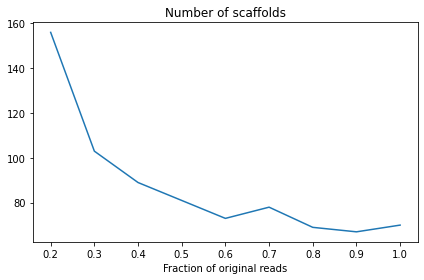

In [7]:
plt.plot(fracs, scaff_count)
plt.title('Number of scaffolds')
plt.xlabel('Fraction of original reads')
plt.tight_layout()

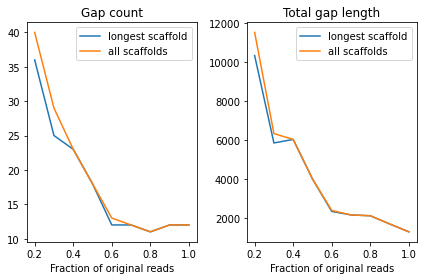

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(fracs, gap_count, label='longest scaffold')
ax1.plot(fracs, total_gap_count, label='all scaffolds')
ax1.legend()
ax1.set_title('Gap count')
ax1.set_xlabel('Fraction of original reads')
ax2.plot(fracs, gap_len, label='longest scaffold')
ax2.plot(fracs, total_gap_len, label='all scaffolds')
ax2.legend()
ax2.set_title('Total gap length')
ax2.set_xlabel('Fraction of original reads')
               
plt.tight_layout()